## <font color=blue > __Data Science and Machine Learning Capstone Project__



## <font color=red > Question 4: 
    
    
### Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?
        
 

## <font color=blue > Answer/Solution: 

## <font color=black > __Notebook Content:__
    1.  Install and import required packages for this notebook
    2.  Read and prepare the Complaints dataset
    3.  Prepare complaints dataset for use in predicting    
    4.  Visualizing Complaints Time Series Data
    5.  Time Series complaints forecasting with ARIMA
    6.  Fitting the Seasonal ARIMA model
    7.  Validating forecasts
    8.  Producing and visualizing forecasts
    9.  Concluding Remarks
    
 
  


#### This Notebook will perform time series analysis to predict the number of complaints in the future complaints. 
#### In this analysis the NYC 311 data is sufficient to start with. Infact, the pluto dataset has static features that do not have dynamic dependence on time. For this reason, only the  NYC 311 comaplint dataset. 
#### However, by importing weather data for the given time interval (2010-2018) as it may help in deciding the HEATING complaints.




## <font color=black > __1. Install and import required packages for this notebook__

In [1]:
%%capture
!pip install folium
!pip install pandas_profiling
!pip install seaborn
%matplotlib inline 
!pip install missingno

In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy
import os
import matplotlib
import numpy as np
import statsmodels.api as sm
import itertools
import warnings

import matplotlib.pyplot as mpltl
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from pylab import rcParams

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## <font color=black > __2. Read and prepare the Complaints dataset__

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='e6a9--- Anonymized before sharing ---509', project_access_token='p-48c--- Anonymized before sharing ---05d')
pc = project.project_context


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-a--- Anonymized before sharing ---de9b',
    'IBM_API_KEY_ID': '8tfX--- Anonymized before sharing ---cnS50',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-de.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-vfimqzgikjdisj',
    'FILE': 'fhrw-4uyv.csv'
}


In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ebb4cba47a2749a5bb939e91483a5e2b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8tfXh--- Anonymized before sharing ---nS50',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ebb4cba47a2749a5bb939e91483a5e2b.get_object(Bucket='capstoneproject-donotdelete-pr-vfimqzgikjdisj',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

complaints_core_df = pd.read_csv(body,
                                 keep_date_col = True, 
                                 parse_dates = ['created_date','closed_date'],
                                 infer_datetime_format = True,
                                 keep_default_na = False, 
                                 low_memory = False
                                )
complaints_core_df.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11 15:54:19,43767067,SAFETY,10024,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.783212031338586,-73.97633377380618,NaT,RESIDENTIAL BUILDING,Open
1,2019-09-11 13:49:51,43767116,PLUMBING,11225,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.66812388766437,-73.95598265878657,NaT,RESIDENTIAL BUILDING,Open
2,2019-09-11 18:42:14,43765197,SAFETY,10037,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.815510167325854,-73.93563231275274,NaT,RESIDENTIAL BUILDING,Open
3,2019-09-11 13:50:49,43764415,DOOR/WINDOW,11233,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.675743774684726,-73.92924550823487,NaT,RESIDENTIAL BUILDING,Open
4,2019-09-11 17:50:31,43765661,UNSANITARY CONDITION,10460,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.84540716646165,-73.88205336303949,NaT,RESIDENTIAL BUILDING,Open


In [6]:
complaints_core_df.dtypes

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                      object
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                          object
longitude                         object
closed_date               datetime64[ns]
location_type                     object
status                            object
dtype: object

In [7]:
complaints_core_df['complaint_type'].value_counts()


HEAT/HOT WATER            1151118
HEATING                    887869
PLUMBING                   702766
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       436779
PAINT - PLASTER            361258
PAINT/PLASTER              341251
ELECTRIC                   303527
NONCONST                   260890
DOOR/WINDOW                199977
WATER LEAK                 187653
GENERAL                    146354
FLOORING/STAIRS            135358
APPLIANCE                  109766
HPD Literature Request      52830
SAFETY                      50054
OUTSIDE BUILDING             7027
ELEVATOR                     6443
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

In [8]:
print(complaints_core_df.shape)
print(complaints_core_df.columns)
complaints_core_df.head()

(5854002, 15)
Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11 15:54:19,43767067,SAFETY,10024,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.783212031338586,-73.97633377380618,NaT,RESIDENTIAL BUILDING,Open
1,2019-09-11 13:49:51,43767116,PLUMBING,11225,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.66812388766437,-73.95598265878657,NaT,RESIDENTIAL BUILDING,Open
2,2019-09-11 18:42:14,43765197,SAFETY,10037,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.815510167325854,-73.93563231275274,NaT,RESIDENTIAL BUILDING,Open
3,2019-09-11 13:50:49,43764415,DOOR/WINDOW,11233,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.675743774684726,-73.92924550823487,NaT,RESIDENTIAL BUILDING,Open
4,2019-09-11 17:50:31,43765661,UNSANITARY CONDITION,10460,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.84540716646165,-73.88205336303949,NaT,RESIDENTIAL BUILDING,Open


In [9]:
####  Create a new consoldated dataframe to be used for the merge of HEATING','HEAT/HOT WATER' 
####  complaint types that happend 1/1 2014 as show in my response to Question 1.

consolidated_complaints_core_df = complaints_core_df

consolidated_complaints_core_df['complaint_type'] = np.where(consolidated_complaints_core_df['complaint_type']=='HEATING','HEAT/HOT WATER',
                                                             consolidated_complaints_core_df['complaint_type'])

complaints_all_df = consolidated_complaints_core_df.loc[(consolidated_complaints_core_df['complaint_type']=='HEAT/HOT WATER')].copy()
complaints_all_df.shape


(2038987, 15)

In [10]:
#### Create Year and Month columns

complaints_all_df['created_year'] = complaints_all_df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
complaints_all_df['created_month'] = complaints_all_df['created_date'].map(lambda x: x.strftime('%m')).astype(int)


In [11]:
complaints_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038987 entries, 10 to 5854000
Data columns (total 17 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              object
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  object
longitude                 object
closed_date               datetime64[ns]
location_type             object
status                    object
created_year              int64
created_month             int64
dtypes: datetime64[ns](2), int64(3), object(12)
memory usage: 280.0+ MB


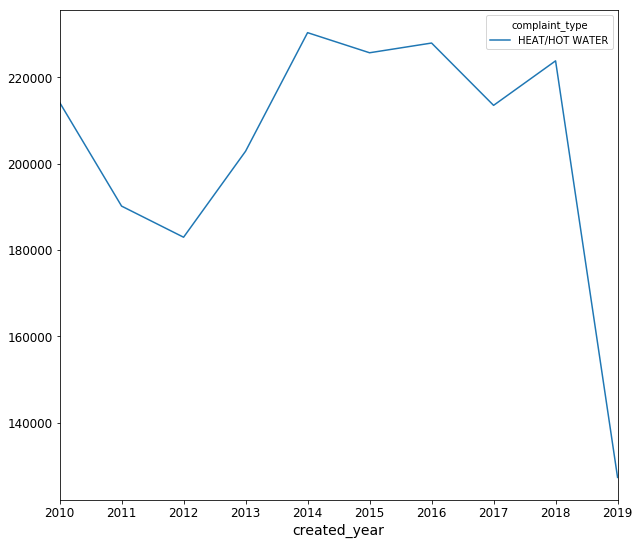

In [12]:
####   Complaints Type "HEAT/HOT WATER" combine and shows figures for full time range

fig, ax = mpltl.subplots(figsize=(10,9))
complaints_all_df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)


## <font color=black > __3. Prepare complaints dataset for use in predicting__

In [13]:
#### Keep the column related to 'created_date' and their unique ID 'unique_key'. 
#### In my view, other features are not important as they are not 
#### dependent on time

cols = ['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
        'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude', 'resolution_description', 
        'status','street_name']
complaints_all_ts_df = complaints_all_df.drop(cols, axis = 1)
complaints_all_ts_df.columns

Index(['created_date', 'unique_key', 'created_year', 'created_month'], dtype='object')

In [14]:
complaints_all_ts_df.head()

,created_date,unique_key,created_year,created_month
10,2019-09-11 15:00:15,43765015,2019,9
17,2019-09-11 16:28:25,43766427,2019,9
27,2019-09-11 05:35:14,43765556,2019,9
43,2019-09-11 06:14:32,43765642,2019,9
47,2019-09-11 11:27:51,43765019,2019,9


In [15]:
complaints_all_ts_df['date'] = complaints_all_ts_df['created_date'].map(lambda x: x.strftime('%Y-%m'))


In [16]:
complaints_all_ts_df['created_year'] = complaints_all_ts_df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

In [17]:
complaints_all_ts_df.head()

,created_date,unique_key,created_year,created_month,date
10,2019-09-11 15:00:15,43765015,2019,9,2019-09
17,2019-09-11 16:28:25,43766427,2019,9,2019-09
27,2019-09-11 05:35:14,43765556,2019,9,2019-09
43,2019-09-11 06:14:32,43765642,2019,9,2019-09
47,2019-09-11 11:27:51,43765019,2019,9,2019-09


## __4.  Visualizing Complaints Time Series Data__

In [18]:
# condition to remove year 2019 complaints from the dataset as it is incomplete yet

complaints_all_ts_df = complaints_all_ts_df[complaints_all_ts_df.created_year != 2019]

# keep the coloumn date in a format '%Y-%m'

complaints_all_ts_df = complaints_all_ts_df.drop(['created_date', 
                                                  'created_year', 
                                                  'created_month'], axis =1)

complaints_all_ts_df = complaints_all_ts_df.sort_values('date')

complaints_all_ts_df.head()

,unique_key,date
316608,15829159,2010-01
285063,15725621,2010-01
285064,15725622,2010-01
285065,15725623,2010-01
285066,15725624,2010-01


In [19]:
#  count the no of complaints 
complaints_all_ts_df = complaints_all_ts_df.groupby(['date']).count()['unique_key']


In [20]:
complaints_all_ts_df = pd.DataFrame(complaints_all_ts_df)
complaints_all_ts_df  = complaints_all_ts_df.rename(index=str, columns={"unique_key": "no_of_complaints"})

In [21]:
complaints_all_ts_df.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='object', name='date', length=108)

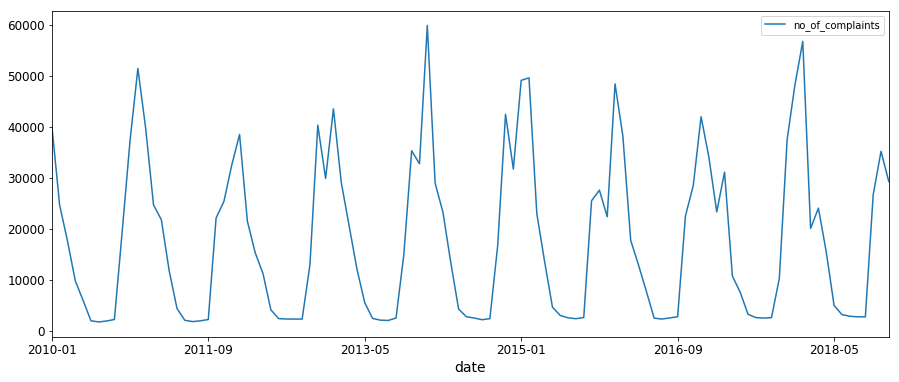

In [22]:
complaints_all_ts_df.plot(figsize=(15, 6))
mpltl.show()

In [23]:
complaints_all_ts_df = complaints_all_ts_df.reset_index('date')
complaints_all_ts_df['date'] = pd.to_datetime(complaints_all_ts_df['date'])
complaints_all_ts_df = complaints_all_ts_df.set_index('date')

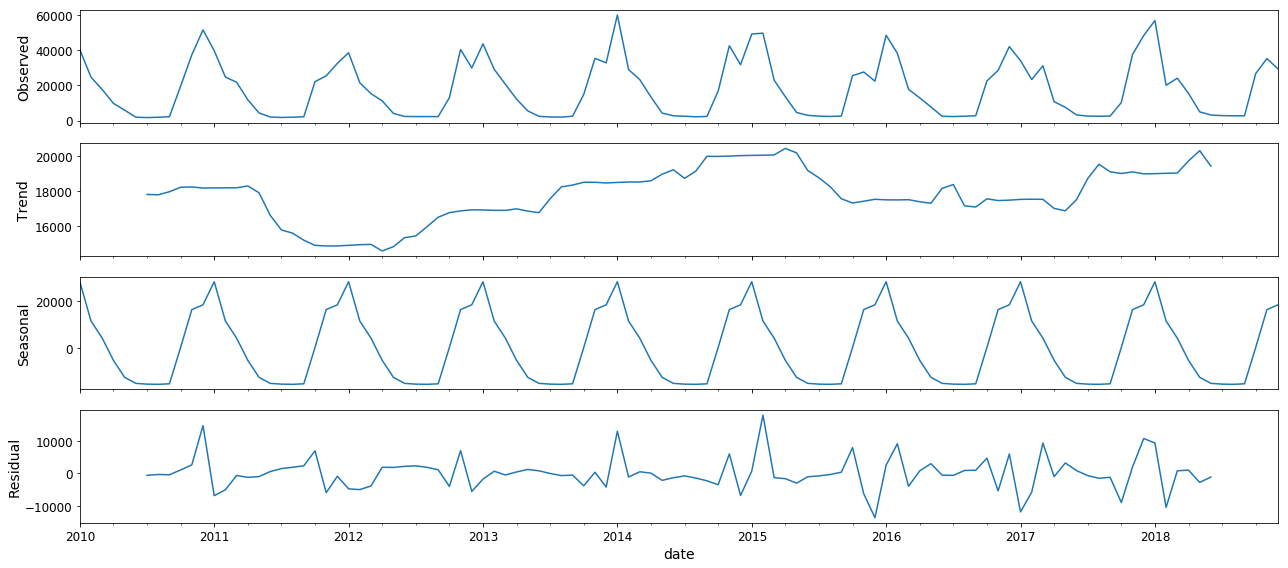

In [24]:
# trend, seasonality, and noise

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(complaints_all_ts_df, model='additive')
fig = decomposition.plot()
mpltl.show()

## <font color=black > __5.  Time Series complaints forecasting with ARIMA__

#### Apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

#### ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### <font color=green> Findings:
#### <font color=green> This step is parameter Selection the number of ccomplaints ARIMA Time Series Model. The goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for the model.

In [26]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(complaints_all_ts_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No fre

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2458.8127313036175
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2132.4799325871186
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1960.625109889384
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1701.338730642129
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1980.1255273119925
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1943.1758766157113


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1725.5979646430412
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1703.2117726131528
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2367.679872438194
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2077.308143790491
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1942.6750890597748


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1684.0008496748014
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2101.7393880952304
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2058.014324025347
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1728.083251676009


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1685.8151166879325
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2291.75487793106
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2017.0842668983025
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2007.1583288556217
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1735.6466342558433
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2012.8300658711246


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1979.098624662344
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1765.3739049455637
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1733.7609335628465
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2272.199552335983


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1994.592798785001
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1936.2672729211586
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1670.6307486471019
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2000.914283092631


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1958.057602368338
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1716.710429413661


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1672.6208669950388
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2308.2706207103015
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2027.6623467501863
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1962.3912380004897
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1703.3035516759953
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1993.9199983645135


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1989.092143346553
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1708.2405105096927


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1705.1047920677295
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2286.968198602464
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2008.9587132849317
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1943.9266328554709


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1686.0963020697036
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1996.0826613962524


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1968.3860449541132
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1710.6017362756465


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1687.8225225549882
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2292.86640937564
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2014.6041683339963
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1989.7658354809778
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1719.4344834702572
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1993.8176035560468


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1986.260898138368
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1729.0929162263112
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1721.4307069672468


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2273.7248604520155
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1987.3092925080816
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1937.997221658752


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1672.464184122353
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1981.8861319520458
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1959.6895134392487


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1697.756050467013
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1674.4545464473258


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#### <font color=green> Findings: 

#### <font color=green>The above output suggests that SARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 1670.630748647103.  

#### <font color=green> ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1670.630748647103

#### <font color=green> Therefore we should consider this to be optimal option to build the SARIMAX model for complaints prediction.


## <font color=black > __6.  Fitting the Seasonal ARIMA model__

In [27]:

mod = sm.tsa.statespace.SARIMAX(complaints_all_ts_df,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

#print(results.summary().tables[0])
#print(results.summary().tables[1])
#print(results.summary().tables[2])

results.summary()

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                   no_of_complaints   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -832.315
Date:                            Tue, 26 Nov 2019   AIC                           1670.631
Time:                                    20:15:44   BIC                           1677.814
Sample:                                01-01-2010   HQIC                          1673.513
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9741      0.094    -10.338      0.000      -1.159      -0.789
ma.S.L12      -0.5299      0.122     -4.328      0.000      -0.770      -0.290
sigma2      7.154e+07   2.02e-10   3.54e+17      0.000    7.15e+07    7.15e+07
===================================================================================
Ljung-Box (Q):                       32.05   Jarque-Bera (JB):                19.04
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             0.72
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.48e+33. Standard errors may be unstable.
"""

#### <font color=green>  Summary statistics shows a very high sigma value which is not correct. Probably one can fix it by taking more parameters into consideration.

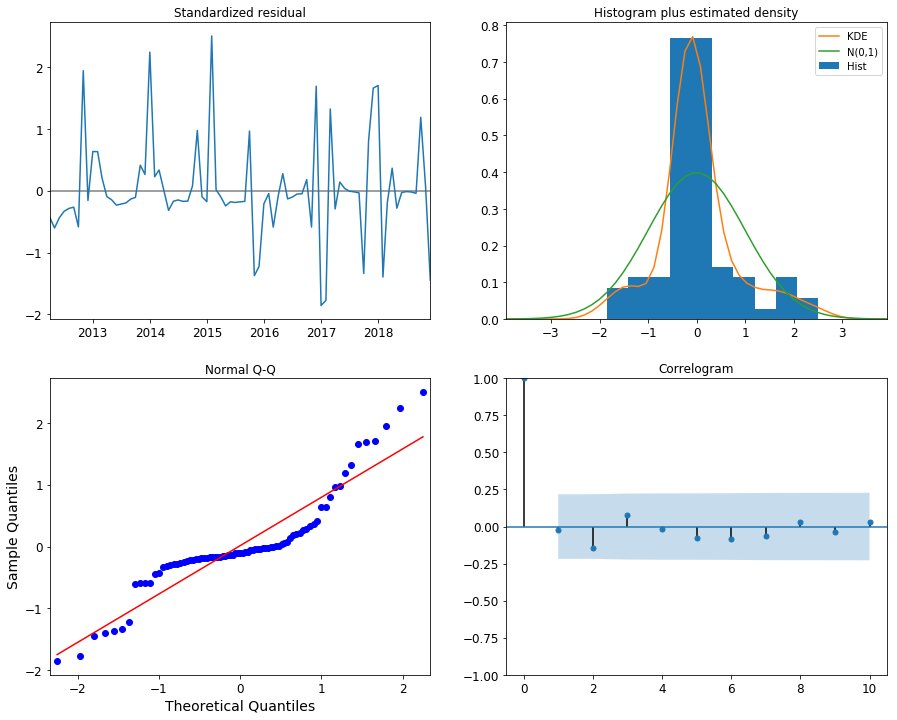

In [28]:
results.plot_diagnostics(figsize=(15, 12))
mpltl.show()


#### <font color=green> Findings: 
#### <font color=green> In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are approximatly normally distributed.
#### <font color=green> The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

## __7. Validating forecasts__

### The accuracy of the forecasts is comparing predicted complaints to the real number of complaints of the time series, and set the forecasts to start at 2017-01 to the end of the data.

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2016-01'), dynamic=False)
pred_ci = pred.conf_int()

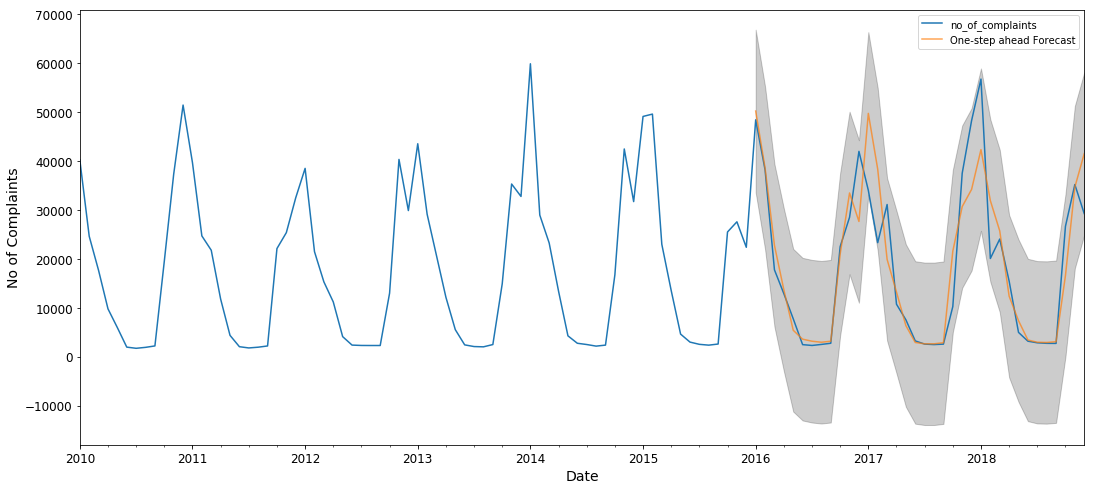

In [30]:
ax = complaints_all_ts_df['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')
mpltl.legend()

mpltl.show()

#### <font color=green> Findings: 
    
#### <font color=green> The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, captured the seasonality toward the winter period.

#### <font color=green> The above one step forcast can be seen to fit well with the actual value, however the confidence interval is large. So we may need to find a better parameters or look at other measures instead of AIC to find the best fits.

In [31]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)

y_truth = complaints_all_ts_df['2017-01':]

# Compute the mean square error
mean_absolute_error = abs((y_forecasted[0] - y_truth['no_of_complaints'] ) ** 1).mean()

print('The Mean Absolute Error of our forecasts is {}'.format(mean_absolute_error))


## print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Absolute Error of our forecasts is 5656.290945823578


## __8. Producing and visualizing forecasts__

In [32]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


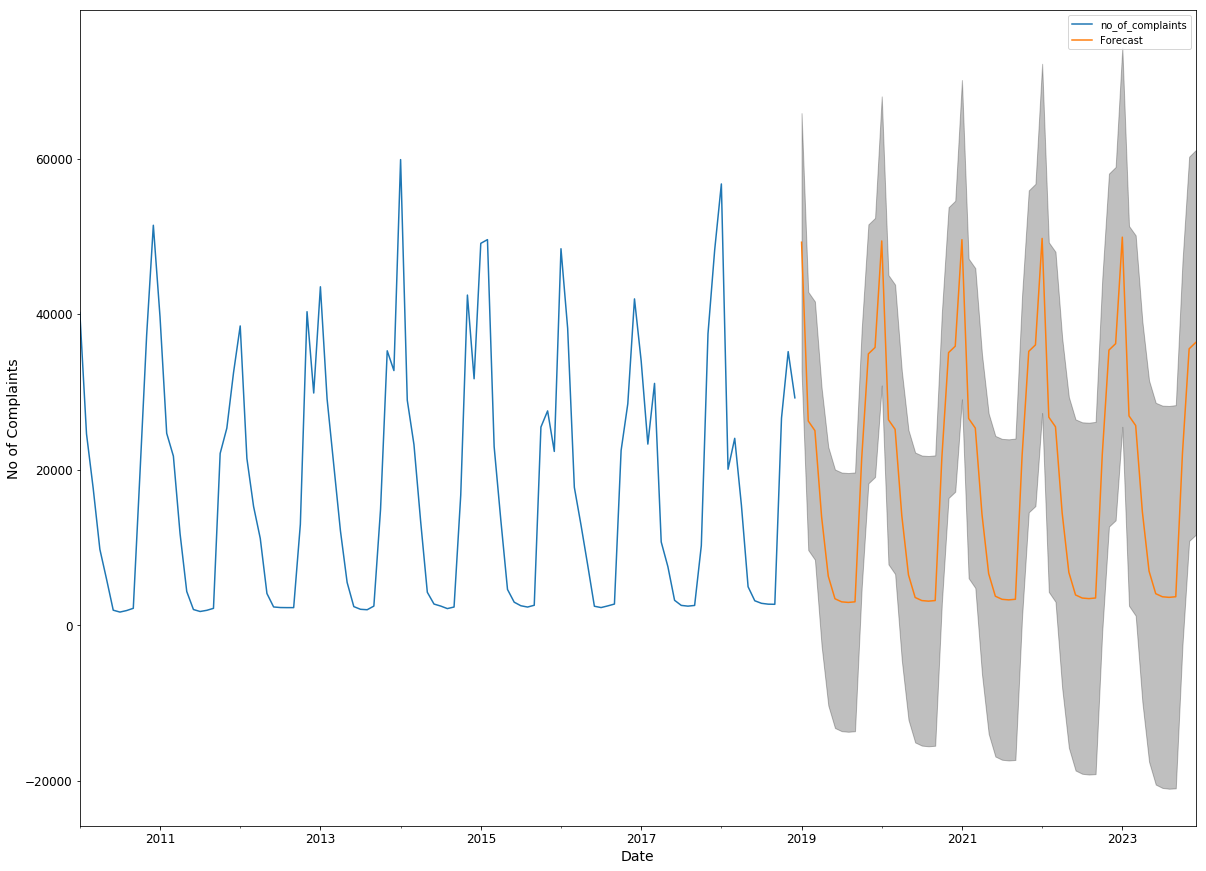

In [33]:
ax = complaints_all_ts_df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')

mpltl.legend()
mpltl.show()

#### <font color=green> Findings: 
#### <font color=green> The model clearly captured complaints seasonality - no suprise as it is a HEAT/HOT WATER complaints dataset. 
#### <font color=green> As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.


## <font color=black> __9. Concluding Remarks__


#### <font color=green> The above 'Time Series Forecasting with ARIMA' has potential to predict the future number of complaints. 
#### <font color=green> Accuracy of forecast decreases as we try to predict more far into the future as can be seen by increase in the confidence interval. The model has large mean absolute error, so it is not so good and ready to predict the future number of complaints. However, this may help the authorities to better handle the Housing problems and allocate the appropriate resouces after a more careful modelling the problem.
#### <font color=green>  The are also other models availble to for such problems such as 'Time Series Forecasting with Prophet'. One can try them and compare the results for more accurate predictions and have more confidence in their venture.